## Assalomu Alaykum Varahmatulloh Vabarakatuh! 

Ushbu tasknni bajarishda Jupyter notebook ning google_coolabrotary IDLE dan foydalandim

###Quyidagi toollarni ishlatdim

*   panda, numpy

###Malumotlarni tozalash va uni trainingga tayyorlash uchun


*   sklearn, label_encoder, standard scaler, numpy


###Model training qilich uchun 

*   Keras
### Visualisation uchun


*   Seaborn
*   Matplotlib

###Training yakunida model **93% accuracy** ga erishdi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Faylni yuklash uchun

In [3]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [4]:
df = pd.read_csv("churn_copy.csv")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Bu yerda mijozlarning va ularning tark etish soni ko'rsatilgan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


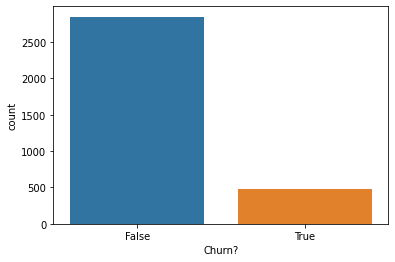

In [5]:
sns.countplot(df["Churn?"])

### O'rtacha qiymatlar

In [6]:
min_col = ['Day Mins','Eve Mins','Night Mins','Intl Mins']
for col in min_col:
  print(f"Avarage of {col}: {df[col].mean()}")

# minimums
for col in min_col[1:]:
  print(f'Minimums of {col}: {df[col].min()}')

Avarage of Day Mins: 179.77509750975116
Avarage of Eve Mins: 200.98034803480346
Avarage of Night Mins: 200.87203720372048
Avarage of Intl Mins: 10.237293729372933
Minimums of Eve Mins: 0.0
Minimums of Night Mins: 23.2
Minimums of Intl Mins: 0.0


In [6]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan           bool
VMail Plan           bool
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?               bool
dtype: object

### Object formatidagi qiymatlarni integer qiymatiga o'tkizib olamiz



In [7]:
for column in df.columns:
  if df[column].dtype == np.number: 
    continue
  else:
    df[column] = LabelEncoder().fit_transform(df[column])
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


State               int64
Account Length      int64
Area Code           int64
Phone               int64
Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?              int64
dtype: object

In [8]:
df.shape

(3333, 21)

In [8]:
y = df['Churn?']
y.size

3333

### Boolean objectlarini 1 va 0 qiymatlari bilan alamshtirib olamiz

### Labeling qilishda oson bo'ladi






In [9]:
y = y.replace({False: 0, True: 1})

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?, dtype: int64

### Bu yerda biz **Neaural Network** uchun kiruvchi **feature** larni ko'rsatamiz yani "Churn?" ustunidan tashqari barcha ustunlar

---


Undan tashqari Label uchun Churn ustunini alohida 
variable saqlaymiz va Standard scaler funksiyasini ishlatamiz

In [11]:
# dropping churn value
X = df.drop("Churn?", axis=1) # Feature

y = df["Churn?"]


X = StandardScaler().fit_transform(X)

In [12]:
X

array([[-6.78649297e-01,  6.81972473e-01, -8.45700361e-04, ...,
        -6.01195090e-01, -8.56904953e-02, -4.27932021e-01],
       [ 6.03169601e-01,  1.51449218e-01, -8.45700361e-04, ...,
        -6.01195090e-01,  1.24116860e+00, -4.27932021e-01],
       [ 3.33312991e-01,  9.09339582e-01, -8.45700361e-04, ...,
         2.11533863e-01,  6.97156372e-01, -1.18821850e+00],
       ...,
       [ 8.73026212e-01, -1.84432874e+00,  1.40851395e+00, ...,
         6.17898340e-01,  1.38712310e+00,  3.32354453e-01],
       [-1.35329082e+00,  2.09670115e+00,  1.40851395e+00, ...,
         2.24335625e+00, -1.87695028e+00,  3.32354453e-01],
       [ 1.07541867e+00, -6.82230182e-01, -8.45700361e-04, ...,
        -1.94830613e-01,  1.24116860e+00, -1.18821850e+00]])

In [13]:
X.shape

(3333, 20)

Train va Test uchun malumotlarni 2 ga ajratib olamiz



*   80% training uchun
*   20% test qilish uchun


*   Doim bir xil data pointlarni olish uchun random state ni ishlatamiz





In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape

(2666, 20)

In [16]:
x_test.shape

(667, 20)

### Endi modelimizni train qilamiz
Bu model 100 ta epoch va ADAM optimizeri bilan 96% aniqlikka erishdi




In [18]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='ADAM',
              loss='binary_crossentropy',
              metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=100)
model.save("NN_model.hdf5")

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7952
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8616
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8657
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8766
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8860
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8931
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9029
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9122
Epoch 9/100
84/84 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.9167
Epoch 10/100
84/84 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9190
Epoch 11/

### Predict qilib ko'ramiz

In [19]:
pred = model.predict(x_test)
pred[:5]

array([[0.00205866],
       [0.02434787],
       [0.99293864],
       [0.00327799],
       [0.00347018]], dtype=float32)

### prediction variable ga **50%** dan katta bo'lgan predictlar uchun True yani 1, va qolganlariga esa False yani 0 qiymatlarini beramiz

In [20]:
predictions = []
for p in pred:
    if p > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [21]:
predictions[:5]

[0, 0, 1, 0, 0]

In [22]:
y_test[:5]

438     0
2674    0
1345    1
1957    0
2148    0
Name: Churn?, dtype: int64

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       566
           1       0.80      0.67      0.73       101

    accuracy                           0.93       667
   macro avg       0.87      0.82      0.84       667
weighted avg       0.92      0.93      0.92       667



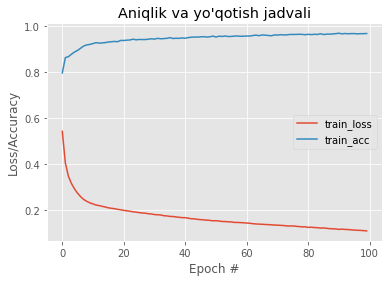

In [27]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")

plt.title("Aniqlik va yo'qotish jadvali")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("jadval.png")
plt.show()
